<a href="https://colab.research.google.com/github/akshpatel26/Machine-Learning-Model/blob/main/multiple_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dataset=pd.read_csv('/content/drive/MyDrive/ML-aksh/Data/Advertising.csv')
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


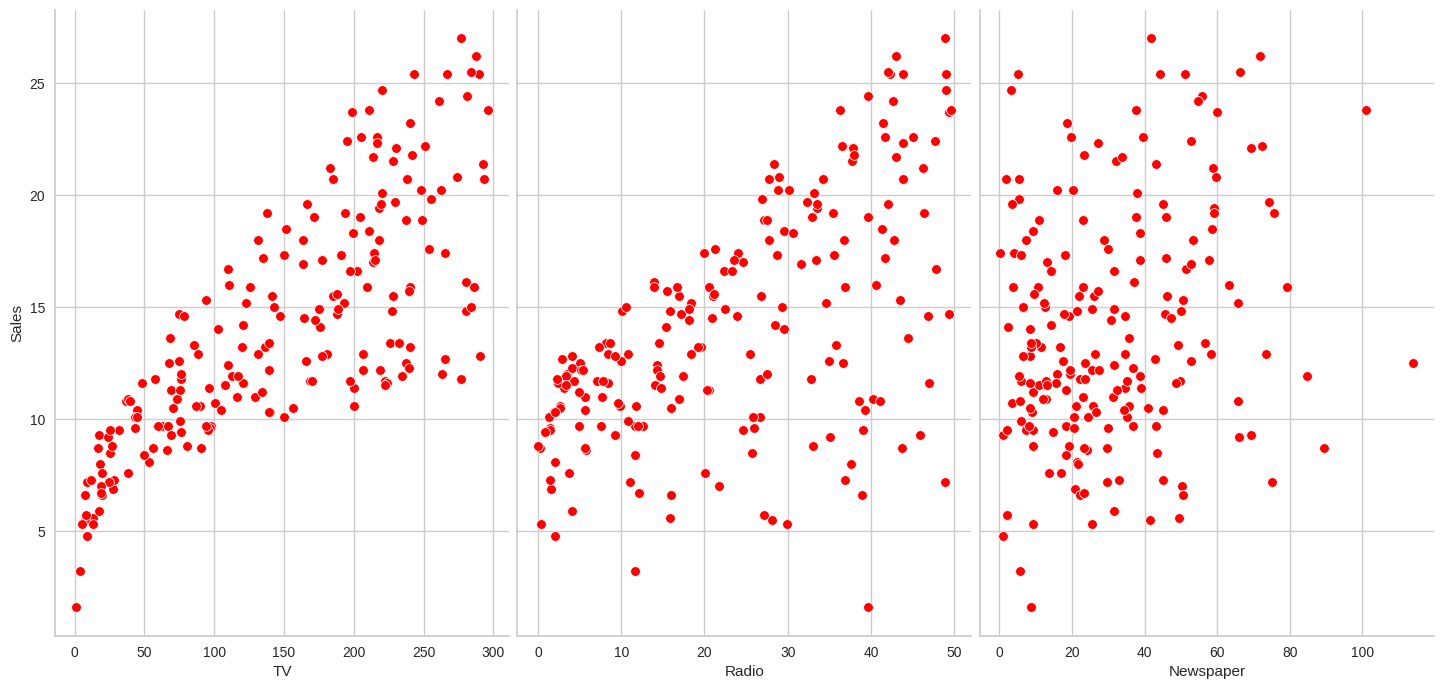

In [ ]:
sns.pairplot(dataset,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,aspect=0.7, plot_kws={'color': 'red'})
plt.show()

In [ ]:
#Setting the value for X and Y
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [ ]:
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)
 x_train
 y_train

,Sales
150,16.1
159,12.9
182,8.7
185,22.6
193,19.6
...,...
63,14.0
70,18.3
81,12.3
11,17.4


In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  3.228620250735169
Coefficients:


[('TV', 0.044817606576770246),
 ('Radio', 0.18029549808987727),
 ('Newspaper', 0.0011701168701606923)]

<Axes: >

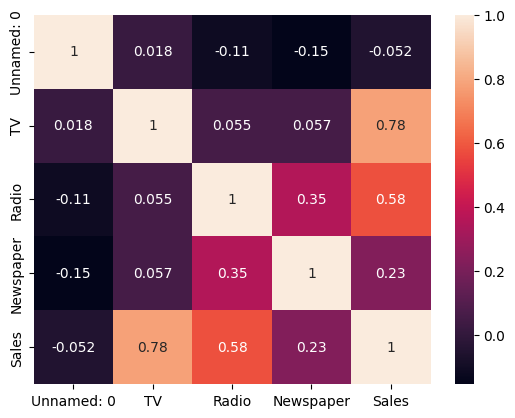

In [ ]:
sns.heatmap(dataset.corr(),annot=True)


In [ ]:
from sklearn.metrics import r2_score
mlr=LinearRegression()
mlr.fit(x[['TV','Radio']],y)
lm2_pred=mlr.predict(x[['TV','Radio']])
print(r2_score(y,lm2_pred))

0.8971942610828957


In [ ]:
mlr=LinearRegression()
mlr.fit(x[['TV','Radio','Newspaper']],y)
lm3_pred=mlr.predict(x[['TV','Radio','Newspaper']])
print(r2_score(y,lm3_pred))

0.8972106381789522


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=dataset.drop('Sales',axis=1)
y=dataset['Sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)

lm4=LinearRegression().fit(x_train,y_train)
lm4_pred=lm4.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm4_pred)))
print("R*2:",r2_score(y_test,lm4_pred))

RMSE: 1.4038934642343048
R*2: 0.9157123993052203


In [ ]:
X=dataset.drop(['Sales','Newspaper'],axis=1)
y=dataset['Sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)

lm5=LinearRegression().fit(x_train,y_train)
lm5_pred=lm5.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm5_pred)))
print("R*2:",r2_score(y_test,lm5_pred))

RMSE: 1.3887762937278112
R*2: 0.9175178493677969


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


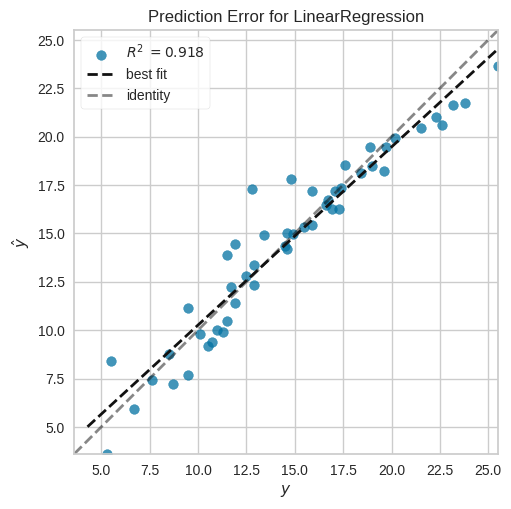

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError,ResidualsPlot
v=PredictionError(lm5).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()

In [ ]:
dataset['interaction']=dataset['TV']*dataset['Radio']
X=dataset[['TV','Radio','interaction']]
y=dataset['Sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)

lm6=LinearRegression().fit(x_train,y_train)
lm6_pred=lm6.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm6_pred)))
print("R*2:",r2_score(y_test,lm6_pred))

RMSE: 0.7011871137164328
R*2: 0.978973681468126


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


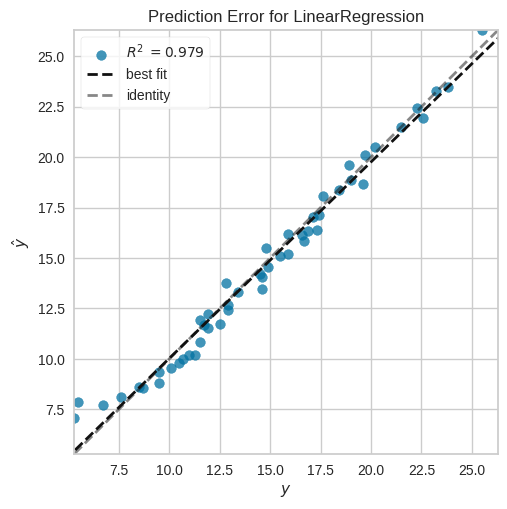

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
v=PredictionError(lm6).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()